# **Introduction**
 Being a baseball fan, I wanted to delve into the 2022 MLB season. I was impressed by the numbers of Aaron Judge and Pete Alonso during the 2022 season. Being a complex sport with numerous statistics, requires a great deal of discipline and consistency. 

 Thanks to [Savant](https://baseballsavant.mlb.com/), I was able to gather highly valuable information to analyze the achievements of players like Judge and Alonso, which helped challenge my initial questions: 
 - How difficult is it to hit more than 30 home runs per season?
 - What qualities do these batters possess to achieve such numbers?

---

##### I wanted to address these questions using more complex stats that might give me a more accurate answer, since many of the standard stats show their overall performance.

### First, I filtered the data to find the top 5 players with the most home runs

## **Top 5 HRs players from 2022 season ([Savant](https://baseballsavant.mlb.com/))** 
- Aaron judge - Yankees
- Kyle Schwarber - Phillies
- Mike Trout - Angels
- Pete Alonso - Mets
- Austin Riley - Braves


|Stats|AVG|OPS|HR|RBI|Hard Hit%|ISO|In Zone Contact%|Out of Zone Contact%|
|-|-|-|-|-|-|-|-|-|
|Aaron Judge|0.311|1.111|62|131|61.8|0.375|79.7|46.5|
|Kyle Schwarber|0.218|0.827|46|94|54.4|0.286|77.1|52.3|
|Mike Trout|0.283|0.999|40|80|51.0|0.347|75.8|53.1|
|Pete Alonso|0.271|0.870|40|131|44.8|0.247|84.3|61.9|
|Austin Riley|0.273|0.877|38|93|50.8|0.255|81.3|52.3|

### **Glossary:**
- AVG: Is a metric used to measure a hitter's achievements at the plate
- OPS: On-base plus slugging(combine how well a hitter can reach base)
- HR: Home Runs 
- RBI: Runs Batted In
- Hard Hit: Percent of balls in play with an exit velocity of 95 mph or more
- Isolated Power(ISO): Batter's raw power by focusing on their ability to hit for extra bases, specifically extra-base   hits (doubles, triples, and home runs)
- In Zone Contact: The percentage of contact made by hitters on swings at pitches within the strike zone
- Out of Zone Contact: The percentage of contact made by hitters on swings at pitches outside the strike zone

---


# **Data Analysis:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### CSV file containing the data provided by Savant

In [3]:
mlb_2022 = pd.read_csv('2022_savant_stats.csv')
mlb_2022.head()

,name,year,player_age,ab,pa,hit,single,double,triple,home_run,...,isolated_power,rbi,b_total_bases,r_total_stolen_base,exit_velocity_avg,hard_hit_percent,oz_contact_percent,pitch_count,iz_contact_percent,whiff_percent
0,Albert Pujols,2022,42,307,351,83,45,14,0,24,...,0.280,68,169,1,91.2,47.3,64.0,1385,88.0,21.3
1,Miguel Cabrera,2022,39,397,433,101,86,10,0,5,...,0.063,43,126,1,89.9,38.2,57.7,1643,80.6,27.0
2,Yadier Molina,2022,39,262,270,56,43,8,0,5,...,0.088,24,79,2,84.7,26.0,71.4,986,81.0,22.0
3,Nelson Cruz Jr.,2022,41,448,507,105,79,16,0,10,...,0.103,64,151,4,90.9,46.1,49.2,1992,76.8,32.0
4,David Peralta,2022,34,439,490,110,65,30,3,12,...,0.164,59,182,1,90.3,44.4,50.2,1830,85.7,26.2


#### Filtering the data to get the Top 5 players with more HR

In [15]:
top5_hr_players = mlb_2022[mlb_2022['home_run'] >= 30].nlargest(5, 'home_run')
more_hr_players = mlb_2022[mlb_2022['home_run'] >= 30]
count = len(more_hr_players)
#strikeout_rate = more_hr_players['so'] / more_hr_players['pa']  
#average_strikeout_rate = strikeout_rate.mean()



#### **Top 5 HR players(with RBIs and total hits) Bar chart**

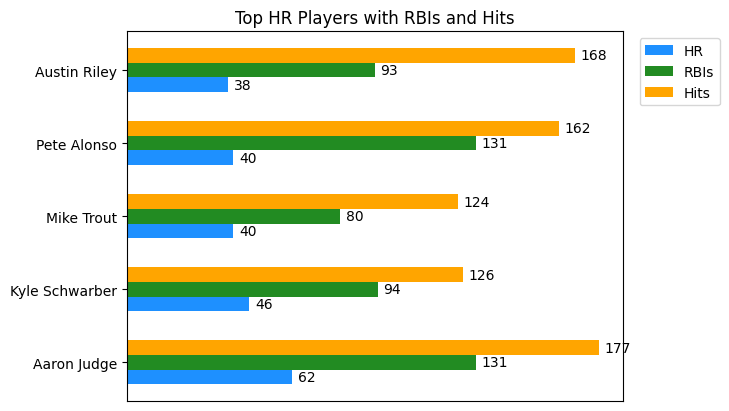

In [6]:
players = top5_hr_players['name']
hr = top5_hr_players['home_run']
rbi = top5_hr_players['rbi']
h = top5_hr_players['hit']

# Set up the figure and axes
fig, ax = plt.subplots()

# Create the chart
index = range(len(players))
bar_width = 0.2

# Plotting HR
hr_bars = ax.barh(index, hr, bar_width, label='HR', color='dodgerblue')

# Plotting RBI
rbi_bars = ax.barh([i + bar_width for i in index], rbi, bar_width, label='RBIs', color='forestgreen')

# Plotting Hits
h_bars = ax.barh([i + bar_width * 2 for i in index], h, bar_width, label='Hits', color='orange')

# Set the x-axis tick positions and labels
ax.set_yticks([i + bar_width for i in index])
ax.set_yticklabels(players)
ax.set_xticks([])

def add_value_annotations(bars, distance):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + distance, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')



# Set the title
ax.set_title('Top HR Players with RBIs and Hits')

# Display the legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
add_value_annotations(hr_bars, 2)

# Add value annotations to RBI bars
add_value_annotations(rbi_bars, 2)

# Add value annotations to OPS bars
add_value_annotations(h_bars, 2)
#add_value_annotations(so_bars, 2)


# Show the bar chart
plt.show()

In [7]:
# MLB average Pitches per Apparence
mlb_average_pitches_per_pa = 708540 / 182051
# MLB Strikeout Rate
mlb_strikeout_rate = 40812 / 182051 * 100
# MLB Hard Hit average
hard_hit_league = 38.4
# MLB Exit Velocity average
exit_velocity_league = 88.6
# Out of the Zone average
oz_contact_percent_league = 57.1
# In the Zone average
iz_contact_percent_league = 81.8
# Whiff average
whiff_league = 25.5
mlb_200_pa_in_zone = mlb_2022['iz_contact_percent'].mean()
mlb_200_pa_iso = mlb_2022['isolated_power'].mean()
print(mlb_average_pitches_per_pa)
print(mlb_200_pa_iso)
print(top5_hr_players['isolated_power'].mean())
print(mlb_strikeout_rate)
print(top5_hr_players['whiff_percent'].mean())

3.8919863115280884
0.15469085173501576
0.30199999999999994
22.417893886877852
28.160000000000004


#### **Comparison of each player's strikeout percentage(season) with the MLB average**

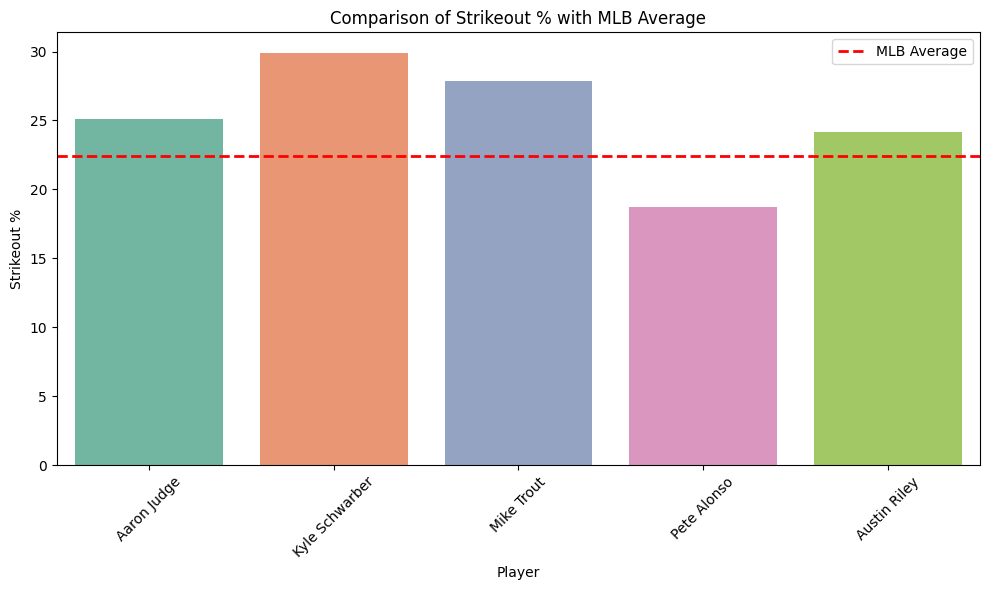

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='k_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line 
plt.axhline(y=mlb_strikeout_rate, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Strikeout %')
plt.title('Comparison of Strikeout % with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **Comparison of each player's Pitches per Appearence with MLB average**

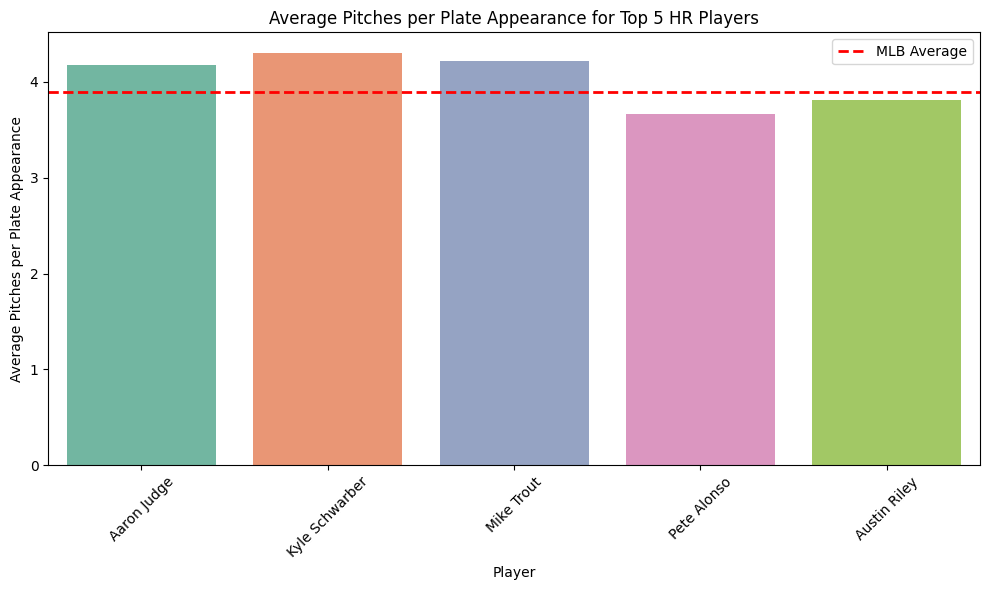

In [9]:

average_pitches = top5_hr_players['pitch_count'] / top5_hr_players['pa']
comparison_df = pd.DataFrame({'Player': top5_hr_players['name'],
                             'Average Pitches per PA': average_pitches})


# Set the plot labels and title
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Player', y='Average Pitches per PA', palette='Set2')
# Add the MLB average line 
plt.axhline(y=mlb_average_pitches_per_pa, color='red', linestyle='--', linewidth=2, label='MLB Average')
plt.title("Average Pitches per Plate Appearance for Top 5 HR Players")
plt.xlabel("Player")
plt.ylabel("Average Pitches per Plate Appearance")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### **Comparison of each player's Hard Hit percentage(season) with MLB average**

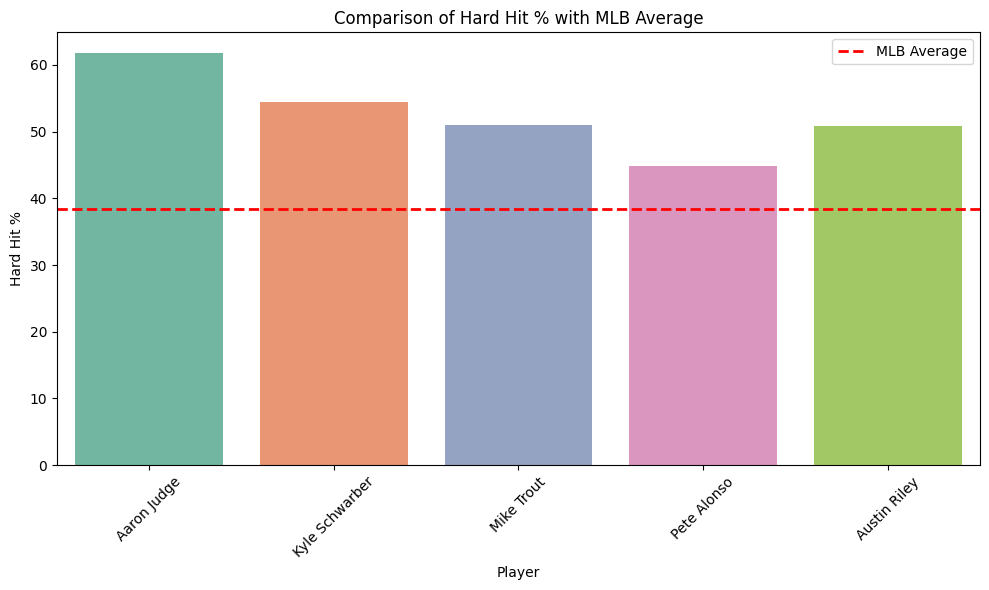

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='hard_hit_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line 
plt.axhline(y=hard_hit_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Hard Hit %')
plt.title('Comparison of Hard Hit % with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **Comparison of each player's Exit Velocity average(MPH) with MLB average**

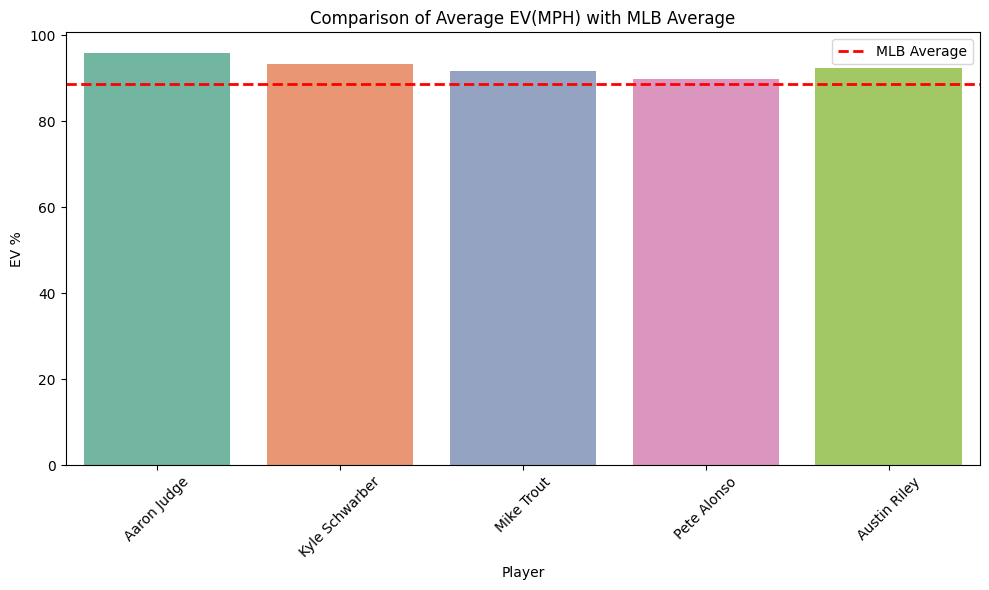

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='exit_velocity_avg', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=exit_velocity_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('EV %')
plt.title('Comparison of Average EV(MPH) with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **Comparison of each player's Whiff Percent(season) with MLB average**

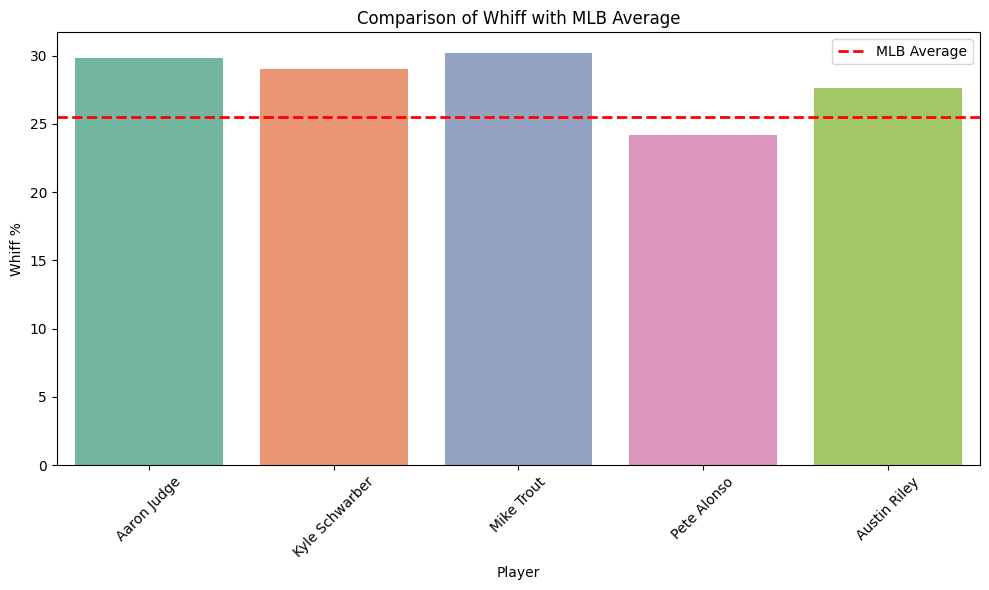

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='whiff_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=whiff_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Whiff %')
plt.title('Comparison of Whiff with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **Comparison of each player's Isolated Power(ISO) with MLB average**

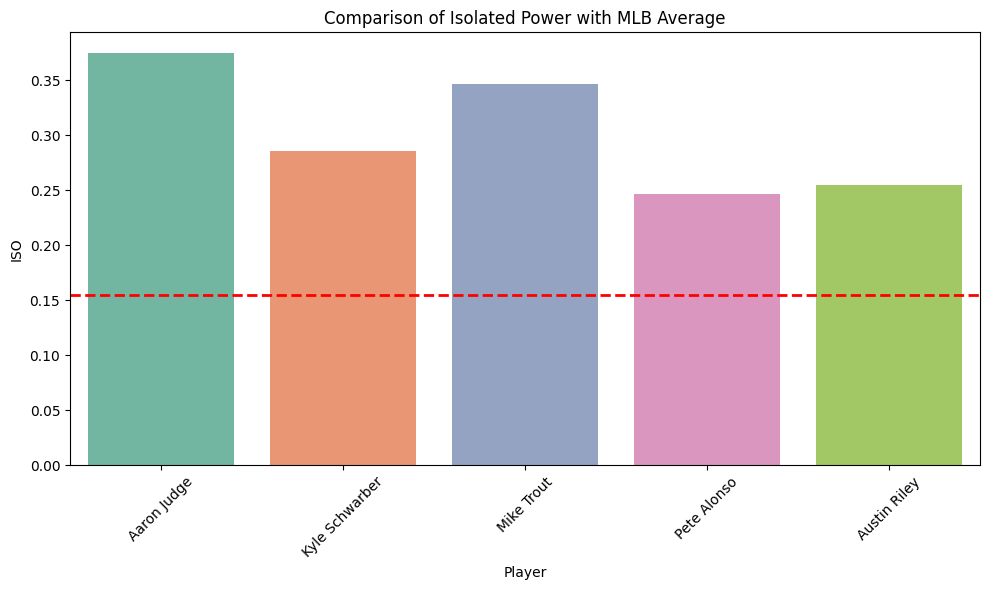

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='isolated_power', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=mlb_200_pa_iso, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('ISO')
plt.title('Comparison of Isolated Power with MLB Average')
plt.xticks(rotation=45)
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **Additional Bar chart, showing the percentage of contact In the Strikeout zone and Out of the Strikeout zone**

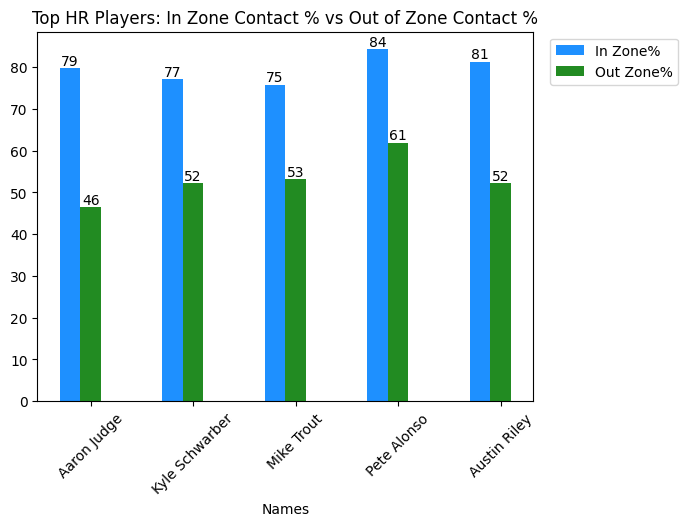

In [14]:
players = top5_hr_players['name']
in_zone = top5_hr_players['iz_contact_percent']
out_zone = top5_hr_players['oz_contact_percent']


# Set up the figure and axes
fig, ax = plt.subplots()

# Create the bar chart
index = range(len(players))
bar_width = 0.2

# Plotting HR
iz_bars = ax.bar(index, in_zone, bar_width, label='In Zone%', color='dodgerblue')

# Plotting RBI
oz_bars = ax.bar([i + bar_width for i in index], out_zone, bar_width, label='Out Zone%', color='forestgreen')

ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(players, rotation=45)
def add_value_annotations(bars, distance):
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + distance, str(int(height)), ha='center', va='bottom')

#plt.axhline(y=iz_contact_percent_league, color='red', linestyle='--', linewidth=2, label='MLB Average')
# Set the x-axis label
ax.set_xlabel('Names')

# Set the title
ax.set_title('Top HR Players: In Zone Contact % vs Out of Zone Contact %')

# Display the legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
add_value_annotations(iz_bars, 0)

# Add value annotations to Out of Zone Contact % bars
add_value_annotations(oz_bars, 0)

# Show the bar chart
plt.show()

### **This advanced stats provide a perspective on the difficulty of achieving their home run numbers and whether they excel in other aspects of the game as well. Now, we can compare the top 5 average to MLB average to see the outstanding difference**


|Stats(%)|Top5 HR players|MLB average|
|-|-|-|
|Strikeout rate |25.1|22.4|
|Pitches per Plate Appearance|4.10|3.89|
|Hard Hit|52.5|38.4|
|Exit Velocity |92.6 mph|88.6 mph|
|Isolated Power(ISO) |0.301|0.154|
|Whiff |28.1|25.5|

- Strikeout rate: Percentage of all plate appearances ending with a Strikeout
- Hard Hit: Percent of balls in play with an exit velocity of 95 mph or more
- Isolated Power(ISO): Batter's raw power by focusing on their ability to hit for extra bases, specifically extra-base   hits (doubles, triples, and home runs)
- Exit Velocity: Average speed of the ball off the bat for balls put into play, measured in miles per hour
- Whiff: This metric calculates the percentage of swings that result in a miss by the hitter, a lower Whiff % indicates better contact skills and a lower tendency to swing and miss

---
|Stats|Hard Hit%|ISO|Whiff%|Avg EV|Pitches per PA|In Zone Contact%|Out of Zone Contact%|
|-|-|-|-|-|-|-|-|
|Aaron Judge|61.8|0.375|29.8|95.9|4.17|79.7|46.5|
|Kyle Schwarber|54.4|0.286|29|93.3|4.30|77.1|52.3|
|Mike Trout|51.0|0.347|30.2|91.6|4.21|75.8|53.1|
|Pete Alonso|44.8|0.247|24.2|89.8|3.65|84.3|61.9|
|Austin Riley|50.8|0.255|27.6|92.5|3.81|81.3|52.3|

---
# **Conclusions:**

#### With these advanced stats, we gain a deeper understanding of the top HR hitters approach at the plate, their ability to make contact, their plate discipline, and their overall effectiveness.

How difficult it's to hit more than 30 home runs per season?
> The result of this question was demonstrated through the Hard Hit, Exit Velocity statistics, which show the power they have when it comes to hitting. Compared to the MLB average, we can deduce that it is very difficult to get the ball out of the field. This power can be useful to contribute to the team's offense, generating RBIs and scoring opportunities. There are some qualities that make players with more capacities to read the dynamics of the game stand out within the top 5.

What qualities do these batters possess to achieve such numbers?
> The most important qualities is the ability to make contact, read pitches for better performance and the power that indicates a greater ability to consistently hit the ball with authority and generate impactful contact.

##### The most complete player with the best plate discipline from the top 5 is **Pete Alonso**, because he generated 40 home runs, 131 RBIs, with the highest batting average inside (84.3%) and outside the strikeout zone (61.9%). In general, a player who can contribute a lot to the team, and an exceptional ability to hit in any circumstance of the game.

##### Also, **Aaron Judge** who broke the record for most Home runs in a season in the American League(62), with 131 RBIs, 61.8% in the season to hit balls faster than 95 MPH and OPS of 1.111(the highest in the MLB), makes him a hitter with abysmal strength, and the best to get the ball out of the field.

##### The difference between these players is that **Judge** has an unmatched ability to hit home runs, being his best quality, while **Alonso** has a greater repertory to not strike out and generate home runs and hits.